In [2]:
pwd

'C:\\Users\\kozlo'

In [3]:
cd /Users/kozlo/Downloads

C:\Users\kozlo\Downloads


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
waw = pd.read_csv("gios-pjp-data(2).csv", index_col=0, sep=";")
waw.head()

,Warszawa-Targówek - pył zawieszony PM10
Zanieczyszczenie,
NaN,NaN
01.01.2018,25.2
02.01.2018,46.3
03.01.2018,17.9
04.01.2018,10.6


In [5]:
waw.dtypes

Warszawa-Targówek - pył zawieszony PM10    float64
dtype: object

In [6]:
cols = ['Warszawa-Targówek - pył zawieszony PM10']
waw[cols] = waw[cols].replace(',','.', regex=True).astype(float)

In [7]:
waw.describe()

,Warszawa-Targówek - pył zawieszony PM10
count,90.000000
mean,40.604444
std,19.929893
min,7.500000
25%,24.050000
50%,38.200000
75%,51.625000
max,92.500000


In [8]:
waw.isna().sum()

Warszawa-Targówek - pył zawieszony PM10    1
dtype: int64

In [36]:
series_value = waw.values

In [37]:
type(series_value)

numpy.ndarray

In [33]:
waw.size

91

In [34]:
waw.tail()

,Warszawa-Targówek - pył zawieszony PM10
Zanieczyszczenie,
27.03.2018,22.1
28.03.2018,29.8
29.03.2018,27.5
30.03.2018,39.7
31.03.2018,41.3


In [9]:
waw['Warszawa-Targówek - pył zawieszony PM10'].fillna(waw['Warszawa-Targówek - pył zawieszony PM10'].mean(), inplace=True)

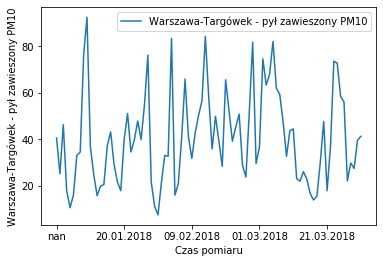

In [10]:
waw['Warszawa-Targówek - pył zawieszony PM10'].plot()
plt.xlabel('Czas pomiaru')
plt.ylabel(cols[0])
plt.legend()
plt.show()

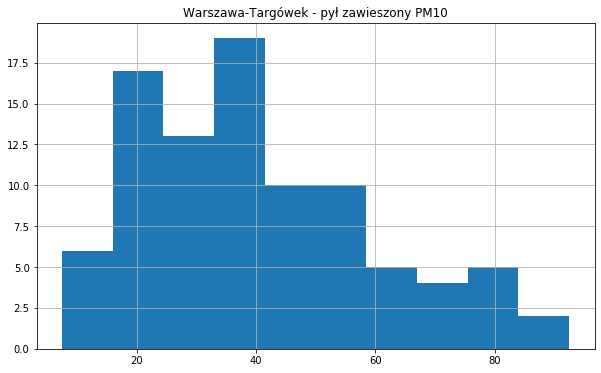

In [11]:
waw.hist(figsize=(10, 6))
plt.show()

Text(0.5, 1.0, 'Warszawa-Targówek - pył zawieszony PM10')

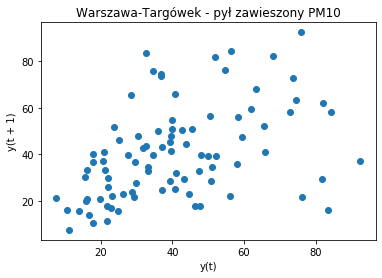

In [12]:
from pandas.plotting import lag_plot
 
lag_plot(waw['Warszawa-Targówek - pył zawieszony PM10'], lag=1)
plt.title('Warszawa-Targówek - pył zawieszony PM10')

Text(0.5, 1.0, 'Warszawa-Targówek - pył zawieszony PM10')

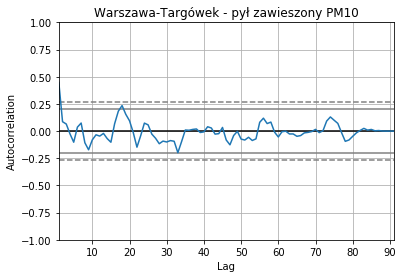

In [13]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(waw['Warszawa-Targówek - pył zawieszony PM10'])
plt.title('Warszawa-Targówek - pył zawieszony PM10')

In [42]:
waw_test = waw[1:]

In [43]:
waw_test.head()

,Warszawa-Targówek - pył zawieszony PM10
Zanieczyszczenie,
01.01.2018,25.2
02.01.2018,46.3
03.01.2018,17.9
04.01.2018,10.6
05.01.2018,16.1


In [44]:
waw_mean = waw.rolling(window = 20).mean()

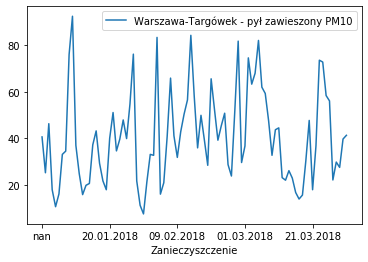

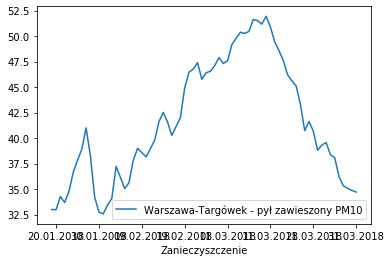

In [45]:
waw.plot()
waw_mean.plot()

In [88]:
waw = waw[0:365]

In [89]:
waw.describe()

,Warszawa-Targówek - pył zawieszony PM10
count,91.000000
mean,40.604444
std,19.818863
min,7.500000
25%,24.300000
50%,39.200000
75%,51.450000
max,92.500000


In [77]:
value = pd.DataFrame(series_value)

In [78]:
PM10_df = pd.concat([value,value.shift(1)], axis=1)

In [79]:
PM10_df.head()

,0,0
0,40.604444,NaN
1,25.200000,40.604444
2,46.300000,25.200000
3,17.900000,46.300000
4,10.600000,17.900000


In [90]:
waw_test = waw_test[0:364]

In [91]:
waw_test.tail()

,Actual_waw,Forecast_waw
86,22.1,56.1
87,29.8,22.1
88,27.5,29.8
89,39.7,27.5
90,41.3,39.7


In [80]:
PM10_df.columns = ['Actual_waw','Forecast_waw'] 

In [92]:
PM10_df.head()

,Actual_waw,Forecast_waw
0,40.604444,NaN
1,25.200000,40.604444
2,46.300000,25.200000
3,17.900000,46.300000
4,10.600000,17.900000


In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
waw_test = PM10_df[1:]

In [84]:
waw_test.head()

,Actual_waw,Forecast_waw
1,25.2,40.604444
2,46.3,25.200000
3,17.9,46.300000
4,10.6,17.900000
5,16.1,10.600000


In [85]:
waw_error = mean_squared_error(waw_test.Actual_waw,waw_test.Forecast_waw)

In [93]:
waw_error

433.9309656515774

In [94]:
np.sqrt(waw_error)

20.831009712723418

In [96]:
ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)

SyntaxError: invalid syntax (<ipython-input-96-c742e4d7378c>, line 1)

In [99]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

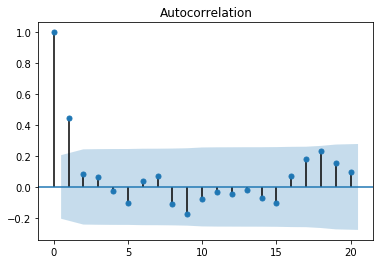

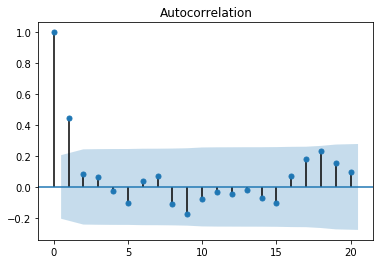

In [100]:
#plot acfis to identify parameter Q
#ARIMA (p,d,q)
plot_acf(waw)

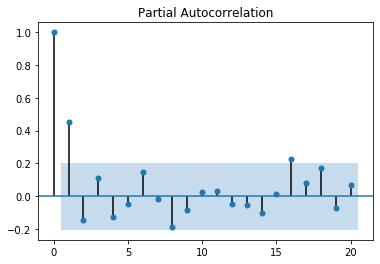

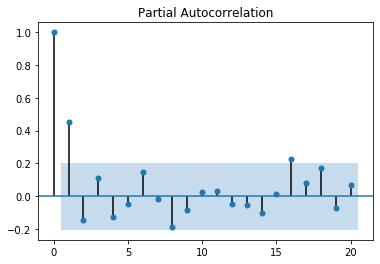

In [162]:
plot_pacf(waw) #to identify the value of P

In [163]:
waw.size

91

In [164]:
waw_train = waw[0:380]
waw_test = waw[0:300]

In [165]:
waw_train.size

91

In [166]:
waw_test.size

91

In [151]:
from statsmodels.tsa.arima_model import ARIMA

In [152]:
waw_model = ARIMA(waw_train, order=(2,0,3))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [153]:
waw_model_fit = waw_model.fit()

In [154]:
waw_model_fit.aic

785.0042579446645

In [167]:
waw_forecast = waw_model_fit.forecast(steps = 91)[0]

In [168]:
waw_forecast

array([39.80801596, 38.61899021, 37.80664496, 41.02407288, 43.0589761 ,
       41.35495751, 38.9908913 , 39.34016472, 41.38546449, 41.98509455,
       40.60341703, 39.5285264 , 40.17383555, 41.31301819, 41.28564843,
       40.36068307, 39.98482639, 40.56465605, 41.11531673, 40.88733306,
       40.34786281, 40.29861143, 40.70988158, 40.92623624, 40.68959975,
       40.41439547, 40.4857324 , 40.73702202, 40.78790804, 40.60835299,
       40.49034095, 40.58352326, 40.71819901, 40.70142152, 40.58624697,
       40.55016342, 40.62697162, 40.68892965, 40.65400456, 40.58931748,
       40.58949446, 40.64142519, 40.66361701, 40.63153213, 40.59994402,
       40.61207899, 40.64261958, 40.64602641, 40.62300954, 40.61037976,
       40.62339895, 40.63912239, 40.63544804, 40.62126356, 40.61810873,
       40.62812254, 40.63495813, 40.6298706 , 40.62220305, 40.62298378,
       40.62946602, 40.63162797, 40.62736144, 40.62379348, 40.62567917,
       40.6293503 , 40.62941752, 40.62650357, 40.62519649, 40.62

In [169]:
waw_test

,Warszawa-Targówek - pył zawieszony PM10
Zanieczyszczenie,
NaN,40.604444
01.01.2018,25.200000
02.01.2018,46.300000
03.01.2018,17.900000
04.01.2018,10.600000
...,...
27.03.2018,22.100000
28.03.2018,29.800000
29.03.2018,27.500000


In [170]:
np.sqrt(mean_squared_error(waw_test,waw_forecast))

19.707373030890505